In [1]:
from google.colab import files
up = files.upload()
# print(up)

Saving Salary_Data.csv to Salary_Data.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
# from sklearn.tree import DecisionTreeRegressor
#from sklearn.ensemble import RandomForestRegressor
#from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
#from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
#from sklearn.pipeline import make_pipeline
#from sklearn.compose import ColumnTransformer
#from sklearn.impute import SimpleImputer
#from sklearn.preprocessing import LabelEncoder

In [3]:
df = pd.read_csv("Salary_Data.csv")
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [4]:
df.shape

(30, 2)

In [5]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [6]:
df.YearsExperience.value_counts()

,count
YearsExperience,
3.2,2
4.0,2
1.1,1
5.3,1
10.3,1
9.6,1
9.5,1
9.0,1
8.7,1


In [7]:
df.YearsExperience.isnull().sum()

0

{'whiskers': [<matplotlib.lines.Line2D at 0x79069789d510>,
 'caps': [<matplotlib.lines.Line2D at 0x79069789e6d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x79069789c990>],
 'medians': [<matplotlib.lines.Line2D at 0x79069789fb10>],
 'fliers': [<matplotlib.lines.Line2D at 0x79069788c510>],
 'means': []}

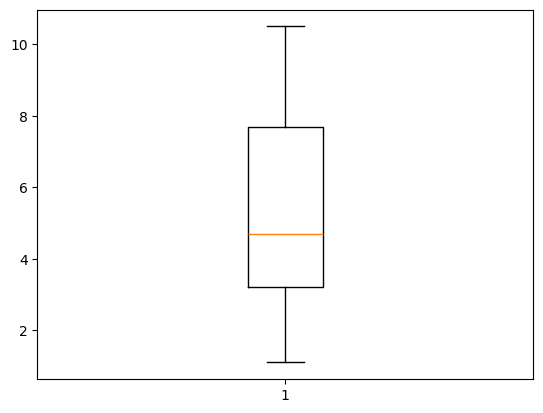

In [8]:
plt.boxplot(df.YearsExperience)

<Axes: ylabel='YearsExperience'>

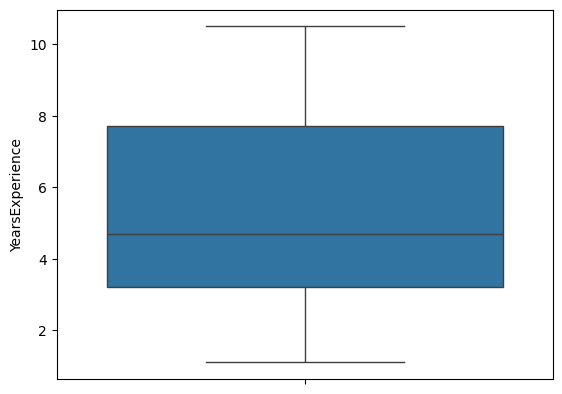

In [9]:
import seaborn as sns
sns.boxplot(df.YearsExperience)

In [10]:
df.duplicated().sum()

0

(array([4., 2., 5., 4., 3., 2., 2., 2., 3., 3.]),
 array([ 1.1 ,  2.04,  2.98,  3.92,  4.86,  5.8 ,  6.74,  7.68,  8.62,
         9.56, 10.5 ]),
 <BarContainer object of 10 artists>)

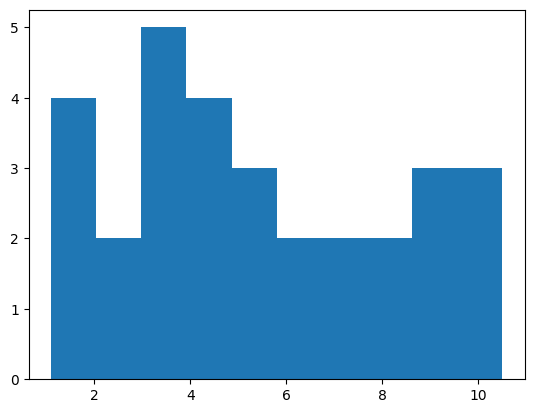

In [11]:
plt.hist(df.YearsExperience)

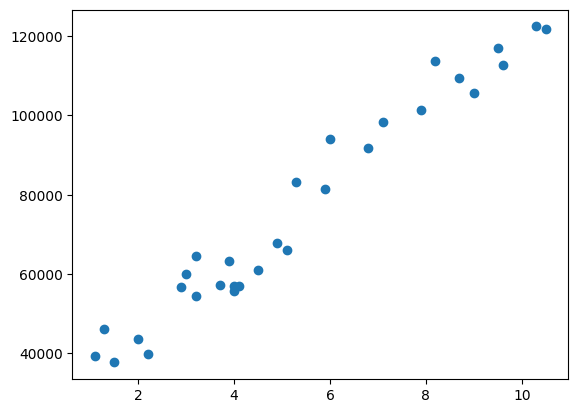

In [12]:
plt.scatter(x=df.YearsExperience,y=df.Salary)

In [13]:
# data preprocessing
X = df.iloc[:, :-1].values #independent variable array
y = df.iloc[:,1].values #dependent variable vector

In [16]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.28,random_state=0)

In [17]:
regressor = LinearRegression()
regressor.fit(X_train,y_train)


LinearRegression()

In [18]:
y_pred = regressor.predict(X_test)
frame = pd.DataFrame({'real values':y_test,'predicted values':y_pred})
frame

,real values,predicted values
0,37731.0,40817.783270
1,122391.0,123188.082589
2,57081.0,65154.462615
3,63218.0,63282.410357
4,116969.0,115699.873560
5,109431.0,108211.664531
6,112635.0,116635.899689
7,55794.0,64218.436486
8,83088.0,76386.776158


In [19]:
y_pred1 = regressor.predict(X_train)
frame1 = pd.DataFrame({'real values':y_train,'predicted values':y_pred1})
frame1.head()

,real values,predicted values
0,101302.0,100723.455502
1,56642.0,53922.149071
2,66029.0,74514.723901
3,64445.0,56730.227457
4,61111.0,68898.567129


In [20]:
y_pred = regressor.predict(X_test)


In [21]:
y_test

array([ 37731., 122391.,  57081.,  63218., 116969., 109431., 112635.,
        55794.,  83088.])

In [22]:
score1 = regressor.score(X_test, y_test)
print(score1)

0.9740993407213511


In [23]:
score12 = regressor.score(X_train, y_train)
print(score12)

0.9423777652193379


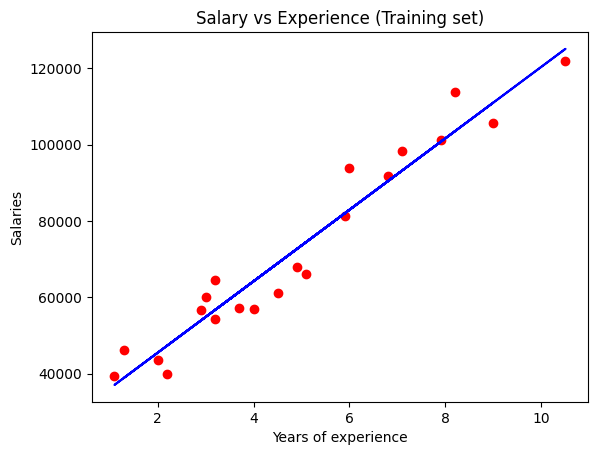

In [24]:
# visualizing the results
#plot for the TRAIN
plt.scatter(X_train, y_train, color='red') # plotting the observation line
plt.plot(X_train, regressor.predict(X_train), color='blue') #plotting the regression line
plt.title('Salary vs Experience (Training set)') # stating the title of the graph
plt.xlabel('Years of experience') # adding the name of x-axis
plt.ylabel('Salaries') # adding the name of y-axis
plt.show() # specifies end of graph

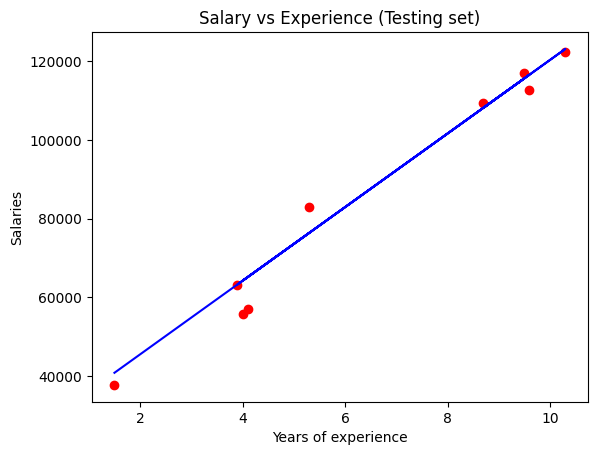

In [25]:
#plot for the TEST

plt.scatter(X_test, y_test, color='red') # Changed X_train, y_train to X_test, y_test
plt.plot(X_test, regressor.predict(X_test), color='blue') # Changed y_test to X_test for the regression line
plt.title('Salary vs Experience (Testing set)')
plt.xlabel('Years of experience')
plt.ylabel('Salaries')
plt.show()

In [26]:
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))

3737.417861878896
23370078.800832972


In [ ]:
# from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
# confusion_matrix_1 = confusion_matrix(y_test,y_pred1)
# sns.heatmap(confusion_matrix_1,annot=True,fmt='d')
# plt.show()

In [ ]:
# cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_1)
# plt.figure(figsize=(10,10))
# cm_display.plot()
# plt.show()

In [27]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Instead of classification_report, use regression metrics:
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared:", r2_score(y_test, y_pred))

Mean Absolute Error: 3737.417861878896
Mean Squared Error: 23370078.800832972
R-squared: 0.9740993407213511


saving thre meodel to our needed place

In [28]:
import pickle

In [29]:
flname = 'triained_model.sav'
pickle.dump(regressor,open(flname, 'wb'))

In [30]:
# loading the saved model
loaded_model = pickle.load(open('triained_model.sav','rb'))

In [31]:
user_input = float(input("Enter the person experience :"))
output = loaded_model.predict([[user_input]])
print('salary based on the year\'s of experience',output)

Enter the person experience :2
salary based on the year's of experience [45497.91391358]


In [32]:
! pip install streamlit -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 79.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 92.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.9 MB/s eta 0:00:00


In [47]:
!pip install -r /content/requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.2/61.2 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 47.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 53.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 51.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 799.2/799.2 kB 31.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 42.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.5/43.5 kB 3.4 MB/s eta 0:00:00
  Attempting uninstall: tenacity
    Found existing installation: tenacity 9.0.0
    Uninstalling tenacity-9.0.0:
      Successfully uninstalled tenacity-9.0.0
  Attempting uninstall: pillow
    Found existing installation: pillow 11.1.0
    Uninstalling pillow-11.1.0:
      Successfully uninstalled pillow-11.1.0
  Attempting uninstall: packaging
    Found existing ins

In [1]:
import warnings

# If you want to filter warnings, use the filterwarnings function:
warnings.filterwarnings("ignore", category=DeprecationWarning) #example

# If you want to issue a warning, use the warn function:
warnings.warn("This is a warning message", category=UserWarning)  #example

<ipython-input-1-832d8cf9a5ba>:7: UserWarning: This is a warning message
  warnings.warn("This is a warning message", category=UserWarning)  #example


In [12]:
%%writefile Streamlit_app.py
import streamlit as st
import pickle

# Load the saved model
loaded_model = pickle.load(open('/content/triained_model.sav', 'rb'))  # Assuming 'trained_model.sav' is your model file

# Create the Streamlit app
st.title("Salary Prediction App")

# Get user input for experience
experience = st.number_input("Enter Years of Experience:", min_value=0.0, step=0.1)

# Make prediction and display
if st.button("Predict Salary"):
    salary_prediction = loaded_model.predict([[experience]])
    st.success(f"Predicted Salary: {salary_prediction[0]:.2f} Rupees")

# Run the Streamlit app
# In your terminal: streamlit run app.py

Overwriting Streamlit_app.py


In [13]:
!wget -q -O - ipv4.icanhazip.com

34.91.249.82


In [14]:
!streamlit run Streamlit_app.py & npx localtunnel --port 8501

⠙⠹⠸⠼⠴⠦


  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://34.91.249.82:8501

your url is: https://six-fans-joke.loca.lt
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.6.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.6.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/usr/local/lib/python